前106个高频词（按文档频率）:
（研究，2659）
（机制，816）
（路径，463）
（策略，280）
（基于，280）
（影响，250）
（智能，248）
（中国，248）
（治理，238）
（协同，217）
（优化，216）
（数字，212）
（创新，196）
（驱动，186）
（视角，177）
（视域，174）
（文化，174）
（风险，170）
（构建，167）
（人工，155）
（教育，155）
（效应，150）
（企业，146）
（机理，145）
（干预，138）
（发展，134）
（政策，127）
（技术，122）
（数据，119）
（融合，116）
（理论，115）
（——，115）
（赋能，112）
（提升，112）
（体系，108）
（及其，106）
（动态，103）
（网络，101）
（社会，100）
（评估，98）
（实践，96）
（行为，95）
（背景，93）
（模式，93）
（高校，92）
（模型，90）
（时代，89）
（生态，86）
（建构，86）
（城市，86）
（传播，84）
（转型，84）
（空间，84）
（韧性，83）
（体育，83）
（设计，81）
（生成式，80）
（模态，79）
（大学生，78）
（价值，78）
（整理，77）
（应用，77）
（生成，75）
（认知，75）
（经济，74）
（产业，72）
（乡村，69）
（识别，69）
（数字化，68）
（健康，65）
（服务，64）
（质量，64）
（数智，63）
（建设，63）
（作用，63）
（叙事，62）
（评价，62）
（民族，62）
（青少年，62）
（AI，61）
（系统，61）
（重构，61）
（学习，61）
（地区，61）
（制度，58）
（形成，57）
（传统，57）
（思想，56）
（信息，56）
（我国，56）
（中华，55）
（知识，54）
（演化，54）
（教师，53）
（资源，53）
（国际，52）
（逻辑，51）
（传承，50）
（职业，50）
（安全，50）
（国家，50）
（对策，50）
（环境，50）
（方法，49）
（儿童，48）
（分析，47）


/tmp/ipykernel_36/187811745.py:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('plasma')


优化后的前 6 个高频词条形图已保存为 top_6_words_barchart_overall.png
优化后的中文词云图已保存为 wordcloud_overall.png


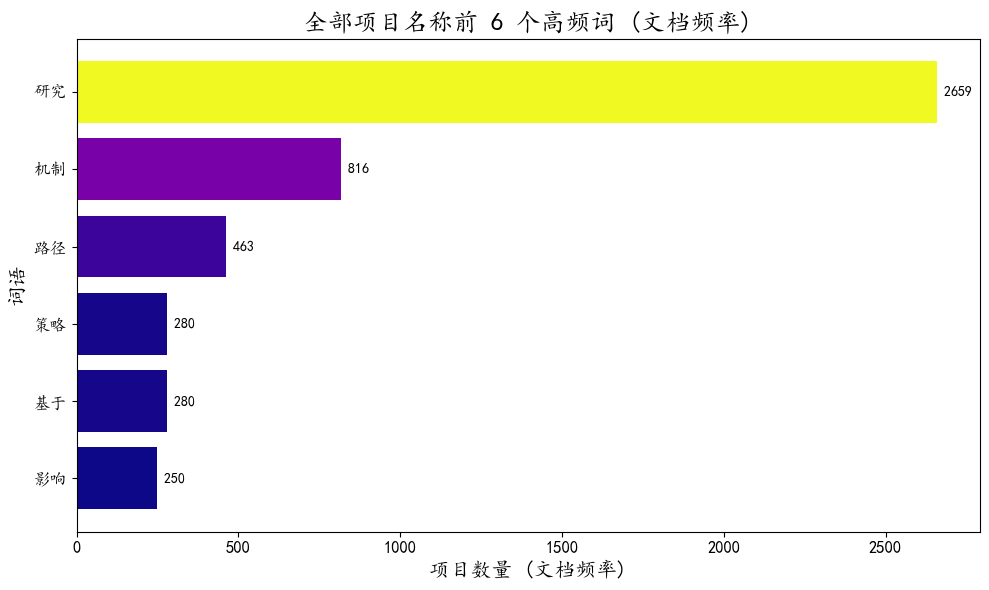

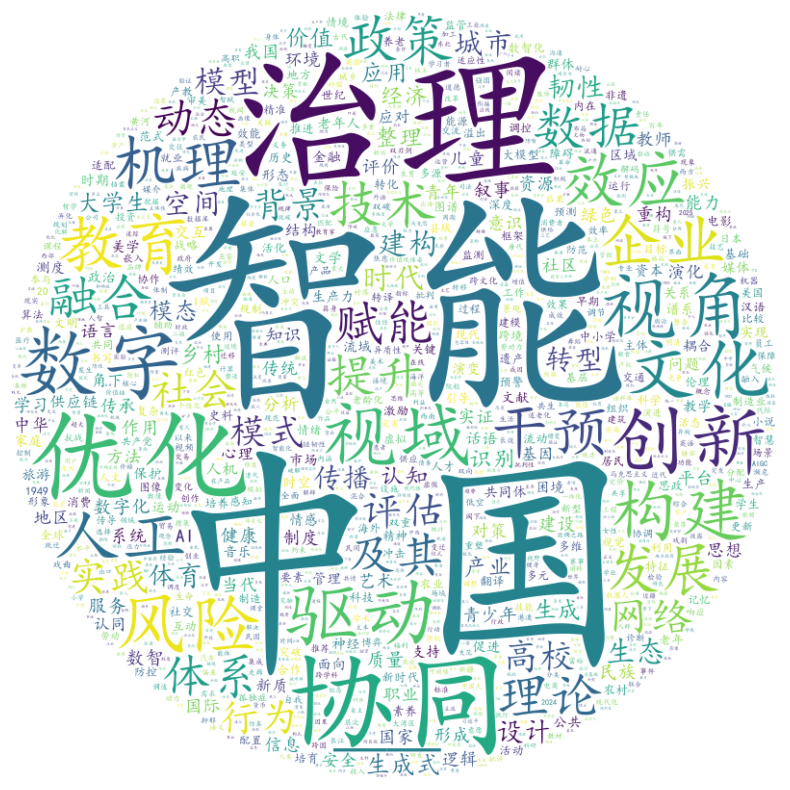

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.font_manager import FontProperties
from collections import Counter
from wordcloud import WordCloud
import numpy as np

# --- 参数与资源设置 ---
N = 6 # 可以随时调整此数值
TOP_K = 100+N  # 新增：需要输出的高频词数量

# 定义您的字体文件路径
font_path = '/kaggle/input/fundings/simkai.ttf'
# 定义您的数据文件路径
csv_path = '/kaggle/input/fundings/2025-jiaoyubu-fenci.csv'

# 1. 在这里添加您不希望统计的词语
# custom_stopwords = {'研究', '基于', '视角', '模式', '背景', '问题', '影响', '策略', '建设', '发展', '机制', '路径','——'}
custom_stopwords = {}

# 加载字体文件
font_prop = FontProperties(fname=font_path)

# --- 数据加载与计算 ---
df = pd.read_csv(csv_path)
# 注意：根据您上传的文件，列名应为'项目名称分词列'
df.dropna(subset=['项目名称分词'], inplace=True)
words_in_docs = [set(text.split()) for text in df['项目名称分词']]
all_words = [word for doc in words_in_docs for word in doc]
doc_freq = Counter(all_words)

# 从词频统计中移除停用词
for word in custom_stopwords:
    if word in doc_freq:
        del doc_freq[word]


top_k_words = doc_freq.most_common(TOP_K)
print(f"前{TOP_K}个高频词（按文档频率）:")
for w, f in top_k_words:
    print(f"（{w}，{f}）")


# --- 绘制前N个高频词的条形图 ---
top_n_words = doc_freq.most_common(N)
words, freqs = zip(*reversed(top_n_words))

# 2. 为条形图创建漂亮的渐变色
cmap = cm.get_cmap('plasma')
norm = colors.Normalize(vmin=min(freqs), vmax=max(freqs))
bar_colors = cmap(norm(freqs))

# 创建图表
plt.figure(figsize=(10, 6))
plt.barh(words, freqs, color=bar_colors)

# 设置中文标题和标签
plt.title(f'全部项目名称前 {N} 个高频词 (文档频率)', fontproperties=font_prop, fontsize=18)
plt.xlabel('项目数量 (文档频率)', fontproperties=font_prop, fontsize=15)
plt.ylabel('词语', fontproperties=font_prop, fontsize=15)

# 3. 将字体和稍大的字号应用到坐标轴刻度上
plt.xticks(fontproperties=font_prop, fontsize=12)
plt.yticks(fontproperties=font_prop, fontsize=12)

# 在每个条形上显示具体的数字
for index, value in enumerate(freqs):
    plt.text(value, index, f' {value}', va='center', fontproperties=font_prop, fontsize=10)

plt.tight_layout()
plt.savefig(f'top_{N}_words_barchart_overall.png', dpi=300)
print(f"优化后的前 {N} 个高频词条形图已保存为 top_{N}_words_barchart_overall.png")

# --- 生成并保存词云图 ---
wordcloud_freq = doc_freq.copy()
# 剔除已在条形图中显示的前N个词
for word, freq in top_n_words:
    del wordcloud_freq[word]

x, y = np.ogrid[:800, :800]
mask = (x - 400)**2 + (y - 400)**2 > 400**2
mask = 255 * mask.astype(int)

wordcloud = WordCloud(
    font_path=font_path,
    background_color='white',
    width=800,
    height=800,
    mask=mask,
    max_words=2000,
    colormap='viridis',
    prefer_horizontal=1.0 # 4. 设置所有词语水平显示，不旋转
).generate_from_frequencies(wordcloud_freq)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud_overall.png', dpi=300)
print("优化后的中文词云图已保存为 wordcloud_overall.png")

前55个高频词（按文档频率）:
（研究，635）
（机制，210）
（路径，112）
（基于，97）
（策略，95）
（智能，85）
（治理，72）
（驱动，67）
（优化，65）
（协同，65）
（风险，61）
（影响，55）
（数字，54）
（干预，54）
（数据，51）
（文化，49）
（中国，43）
（视角，43）
（城市，41）
（创新，40）
（视域，40）
（评估，40）
（空间，39）
（人工，38）
（机理，37）
（构建，37）
（模态，35）
（动态，34）
（韧性，34）
（融合，34）
（设计，34）
（生成式，32）
（社会，32）
（学习，31）
（识别，31）
（模式，31）
（赋能，31）
（行为，31）
（技术，31）
（网络，30）
（背景，30）
（教育，29）
（提升，29）
（模型，29）
（发展，28）
（认知，28）
（健康，28）
（方法，27）
（效应，26）
（青少年，25）
（评价，25）
（——，24）
（传播，24）
（体系，24）
（及其，23）


/tmp/ipykernel_36/3264902541.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('plasma')


优化后的前 5 个高频词条形图已保存为 top_5_words_barchart_cross.png
优化后的中文词云图已保存为 wordcloud_cross.png


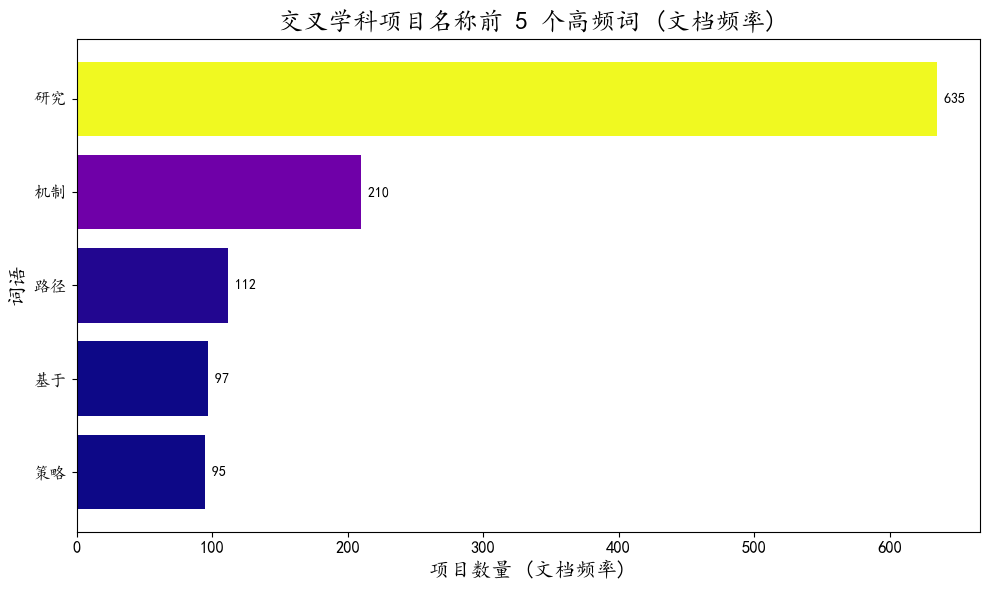

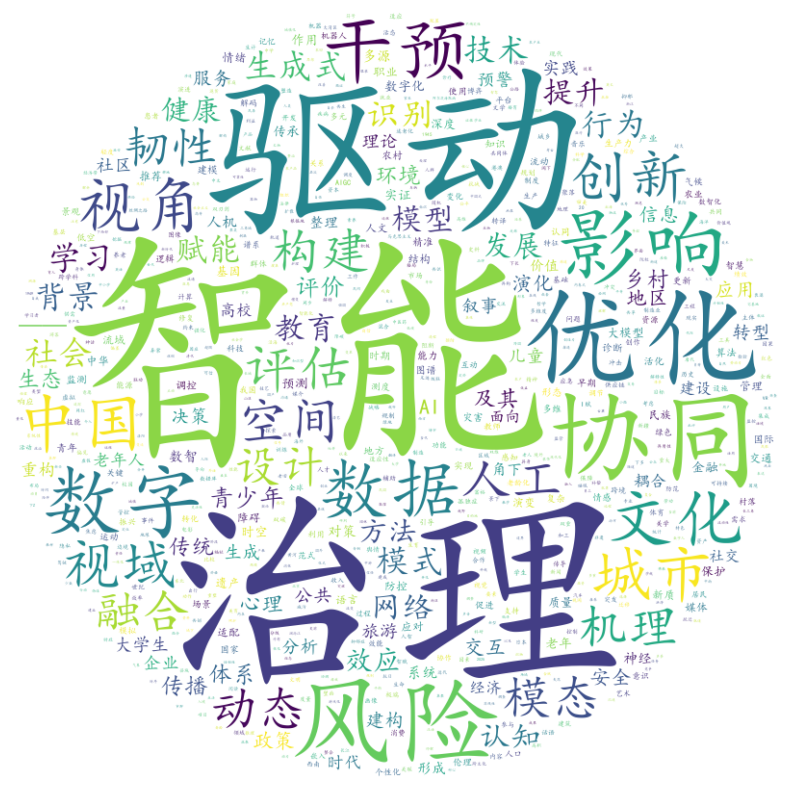

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.font_manager import FontProperties
from collections import Counter
from wordcloud import WordCloud
import numpy as np

# --- 参数与资源设置 ---
N = 5 # 您可以随时调整此数值
TOP_K = 50 + N  # 新增：需要输出的高频词数量


# 定义您的字体文件路径
font_path = '/kaggle/input/fundings/simkai.ttf'
# 定义您的数据文件路径
csv_path = '/kaggle/input/fundings/2025-jiaoyubu-fenci.csv'

# 1. 在这里添加您不希望统计的词语
# custom_stopwords = {'研究', '基于', '视角', '模式', '背景', '问题', '影响', '策略', '建设', '发展', '机制', '路径','——'}
custom_stopwords = {}

# 加载字体文件
font_prop = FontProperties(fname=font_path)

# --- 数据加载与计算 ---
df = pd.read_csv(csv_path)

# --- 核心改动：按学科门类筛选数据 ---
df = df[df['学科门类'] == '交叉学科/综合研究'].copy()

df.dropna(subset=['项目名称分词'], inplace=True)
words_in_docs = [set(text.split()) for text in df['项目名称分词']]
all_words = [word for doc in words_in_docs for word in doc]
doc_freq = Counter(all_words)

# 从词频统计中移除停用词
for word in custom_stopwords:
    if word in doc_freq:
        del doc_freq[word]

top_k_words = doc_freq.most_common(TOP_K)
print(f"前{TOP_K}个高频词（按文档频率）:")
for w, f in top_k_words:
    print(f"（{w}，{f}）")


# --- 绘制前N个高频词的条形图 ---
top_n_words = doc_freq.most_common(N)
words, freqs = zip(*reversed(top_n_words))

# 2. 为条形图创建漂亮的渐变色
cmap = cm.get_cmap('plasma')
norm = colors.Normalize(vmin=min(freqs), vmax=max(freqs))
bar_colors = cmap(norm(freqs))

# 创建图表
plt.figure(figsize=(10, 6))
plt.barh(words, freqs, color=bar_colors)

# 设置中文标题和标签
plt.title(f'交叉学科项目名称前 {N} 个高频词 (文档频率)', fontproperties=font_prop, fontsize=18)
plt.xlabel('项目数量 (文档频率)', fontproperties=font_prop, fontsize=15)
plt.ylabel('词语', fontproperties=font_prop, fontsize=15)

# 3. 将字体和稍大的字号应用到坐标轴刻度上
plt.xticks(fontproperties=font_prop, fontsize=12)
plt.yticks(fontproperties=font_prop, fontsize=12)

# 在每个条形上显示具体的数字
for index, value in enumerate(freqs):
    plt.text(value, index, f' {value}', va='center', fontproperties=font_prop, fontsize=10)

plt.tight_layout()
plt.savefig(f'top_{N}_words_barchart_cross.png', dpi=300)
print(f"优化后的前 {N} 个高频词条形图已保存为 top_{N}_words_barchart_cross.png")

# --- 生成并保存词云图 ---
wordcloud_freq = doc_freq.copy()
# 剔除已在条形图中显示的前N个词
for word, freq in top_n_words:
    del wordcloud_freq[word]

x, y = np.ogrid[:800, :800]
mask = (x - 400)**2 + (y - 400)**2 > 400**2
mask = 255 * mask.astype(int)

wordcloud = WordCloud(
    font_path=font_path,
    background_color='white',
    width=800,
    height=800,
    mask=mask,
    max_words=2000,
    colormap='viridis',
    prefer_horizontal=1.0 # 4. 设置所有词语水平显示，不旋转
).generate_from_frequencies(wordcloud_freq)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud_cross.png', dpi=300)
print("优化后的中文词云图已保存为 wordcloud_cross.png")

前63个高频词（按文档频率）:
（研究，330）
（机制，172）
（企业，73）
（路径，73）
（策略，72）
（协同，64）
（影响，63）
（优化，53）
（治理，53）
（基于，50）
（效应，49）
（视角，47）
（驱动，47）
（创新，43）
（智能，41）
（技术，38）
（机理，38）
（人工，32）
（——，31）
（数字，30）
（动态，29）
（风险，28）
（系统，27）
（政策，26）
（价值，25）
（供应链，25）
（数据，25）
（韧性，25）
（行为，25）
（平台，24）
（提升，24）
（生态，23）
（作用，23）
（信息，18）
（产业，18）
（形成，17）
（决策，17）
（模式，17）
（融合，17）
（质量，17）
（转型，17）
（演化，16）
（资源，16）
（经济，16）
（城市，15）
（网络，15）
（AI，15）
（服务，15）
（评估，15）
（赋能，14）
（制度，14）
（数字化，13）
（社会，13）
（绿色，13）
（及其，12）
（环境，12）
（角下，12）
（员工，12）
（发展，11）
（消费者，11）
（激励，11）
（干预，11）
（中国，11）


/tmp/ipykernel_36/595500132.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('plasma')


优化后的前 13 个高频词条形图已保存为 top_13_words_barchart_management.png
优化后的中文词云图已保存为 wordcloud_management.png


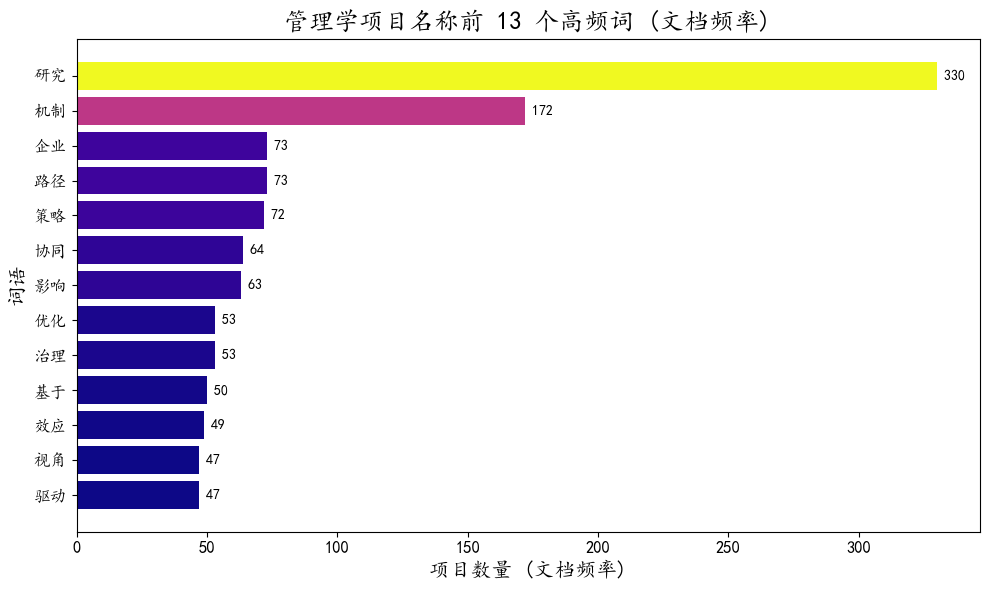

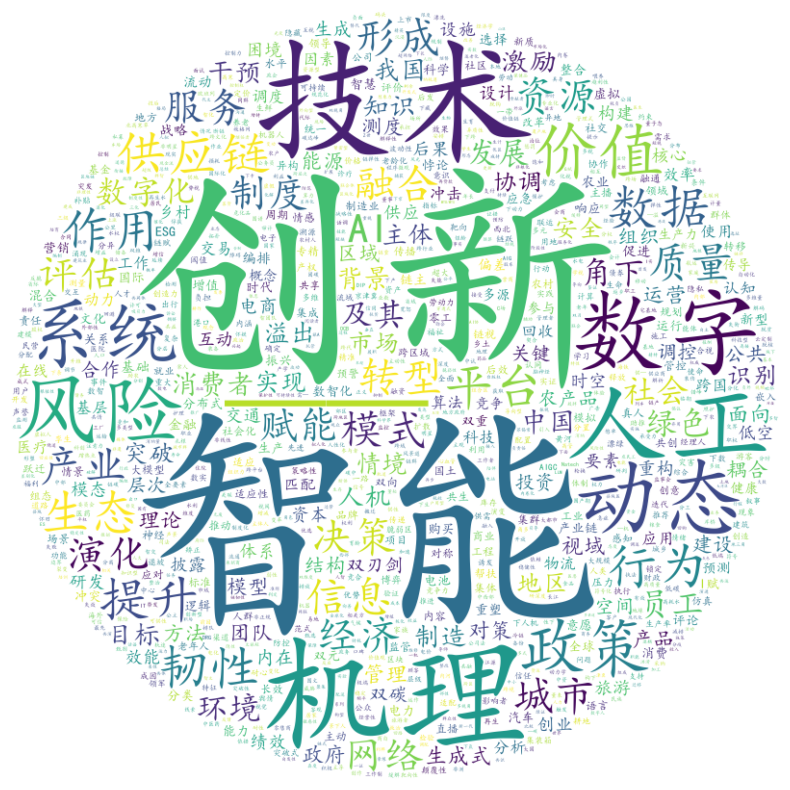

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.font_manager import FontProperties
from collections import Counter
from wordcloud import WordCloud
import numpy as np

# --- 参数与资源设置 ---
N = 13 # 您可以随时调整此数值
TOP_K = 50 + N

# 定义您的字体文件路径
font_path = '/kaggle/input/fundings/simkai.ttf'
# 定义您的数据文件路径
csv_path = '/kaggle/input/fundings/2025-jiaoyubu-fenci.csv'

# 1. 在这里添加您不希望统计的词语
# custom_stopwords = {'研究', '基于', '视角', '模式', '背景', '问题', '影响', '策略', '建设', '发展', '机制', '路径','——'}
custom_stopwords = {}

# 加载字体文件
font_prop = FontProperties(fname=font_path)

# --- 数据加载与计算 ---
df = pd.read_csv(csv_path)

# --- 核心改动：按学科门类筛选数据 ---
df = df[df['学科门类'] == '管理学'].copy()

df.dropna(subset=['项目名称分词'], inplace=True)
words_in_docs = [set(text.split()) for text in df['项目名称分词']]
all_words = [word for doc in words_in_docs for word in doc]
doc_freq = Counter(all_words)

# 从词频统计中移除停用词
for word in custom_stopwords:
    if word in doc_freq:
        del doc_freq[word]

top_k_words = doc_freq.most_common(TOP_K)
print(f"前{TOP_K}个高频词（按文档频率）:")
for w, f in top_k_words:
    print(f"（{w}，{f}）")


# --- 绘制前N个高频词的条形图 ---
top_n_words = doc_freq.most_common(N)
words, freqs = zip(*reversed(top_n_words))

# 2. 为条形图创建漂亮的渐变色
cmap = cm.get_cmap('plasma')
norm = colors.Normalize(vmin=min(freqs), vmax=max(freqs))
bar_colors = cmap(norm(freqs))

# 创建图表
plt.figure(figsize=(10, 6))
plt.barh(words, freqs, color=bar_colors)

# 设置中文标题和标签
plt.title(f'管理学项目名称前 {N} 个高频词 (文档频率)', fontproperties=font_prop, fontsize=18)
plt.xlabel('项目数量 (文档频率)', fontproperties=font_prop, fontsize=15)
plt.ylabel('词语', fontproperties=font_prop, fontsize=15)

# 3. 将字体和稍大的字号应用到坐标轴刻度上
plt.xticks(fontproperties=font_prop, fontsize=12)
plt.yticks(fontproperties=font_prop, fontsize=12)

# 在每个条形上显示具体的数字
for index, value in enumerate(freqs):
    plt.text(value, index, f' {value}', va='center', fontproperties=font_prop, fontsize=10)

plt.tight_layout()
plt.savefig(f'top_{N}_words_barchart_management.png', dpi=300)
print(f"优化后的前 {N} 个高频词条形图已保存为 top_{N}_words_barchart_management.png")

# --- 生成并保存词云图 ---
wordcloud_freq = doc_freq.copy()
# 剔除已在条形图中显示的前N个词
for word, freq in top_n_words:
    del wordcloud_freq[word]

x, y = np.ogrid[:800, :800]
mask = (x - 400)**2 + (y - 400)**2 > 400**2
mask = 255 * mask.astype(int)

wordcloud = WordCloud(
    font_path=font_path,
    background_color='white',
    width=800,
    height=800,
    mask=mask,
    max_words=2000,
    colormap='viridis',
    prefer_horizontal=1.0 # 4. 设置所有词语水平显示，不旋转
).generate_from_frequencies(wordcloud_freq)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud_management.png', dpi=300)
print("优化后的中文词云图已保存为 wordcloud_management.png")